In [219]:
import pandas as pd
import seaborn as sns
import numpy as np
import powerlaw
import regex as re
import matplotlib.pyplot as plt

In [220]:
df = pd.read_csv('../data/nodes.csv')
field = 'Degree'
df2 = df.groupby(field).size()
df2 = df2.reset_index(name='Number of Nodes')

In [221]:
df2 =df2.head(10)

In [222]:
df2[f'log_{field}'] = np.log10(df2[field])
df2['log_Number of Nodes'] = np.log10(df2['Number of Nodes'])
df2.head(20)

,Degree,Number of Nodes,log_Degree,log_Number of Nodes
0,1,17263,0.000000,4.237116
1,2,4663,0.301030,3.668665
2,3,692,0.477121,2.840106
3,4,306,0.602060,2.485721
4,5,124,0.698970,2.093422
5,6,67,0.778151,1.826075
6,7,32,0.845098,1.505150
7,8,18,0.903090,1.255273
8,9,9,0.954243,0.954243
9,10,9,1.000000,0.954243


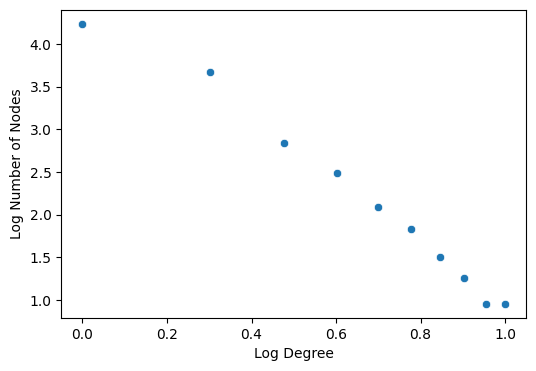

In [226]:
figure = plt.figure(figsize=(6, 4))
plt.xlabel('Log Degree')
plt.ylabel('Log Number of Nodes')
sns.scatterplot(data=df2, x=f'log_{field}', y='log_Number of Nodes',)
plt.savefig('degree_log_distribution.png')

AttributeError: module 'matplotlib.pyplot' has no attribute 'pyplot'

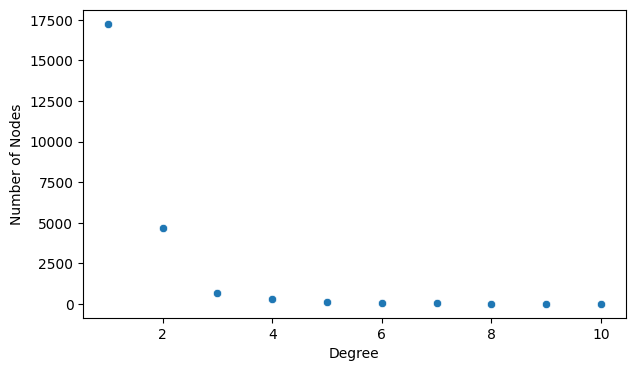

In [227]:
plt.figure(figsize=(7, 4))
sns.scatterplot(data=df2, x=field, y='Number of Nodes')
plt.savefig('indegree.png')

C:\Users\karyo\AppData\Local\Temp\ipykernel_17456\913789668.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df2, x=field, y='Number of Nodes',palette="viridis")


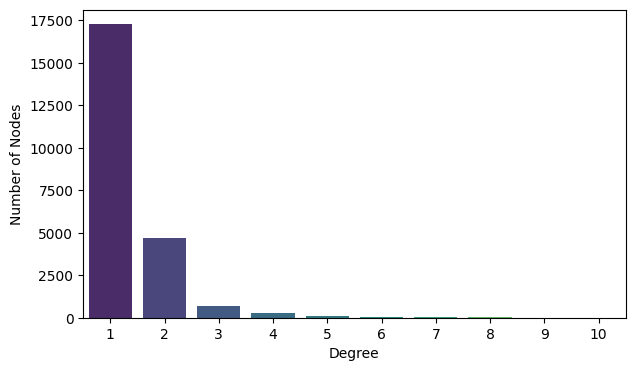

In [206]:
# Creating the histogram
df2[field] = df2[field].head(10)
plt.figure(figsize=(7, 4))
sns.barplot(data=df2, x=field, y='Number of Nodes',palette="viridis")
plt.savefig('indegree_hist.png')

In [207]:
# Fit the data to a power-law model
fit = powerlaw.Fit(df2['Number of Nodes'])
print(f"Alpha: {fit.power_law.alpha}")
print(f"xmin: {fit.power_law.xmin}")
R, p = fit.distribution_compare('power_law', 'lognormal')
print(f"R: {R}, p-value: {p}")


Calculating best minimal value for power law fit
Alpha: 1.3537294770523864
xmin: 9.0
R: -0.10977326484616867, p-value: 0.7726881621224067


In [208]:
df.sort_values(by='Degree', ascending=False).head(10)['Label'].tolist()

['leokapa.bsky.social',
 'righto.com',
 'alex-mano.bsky.social',
 'sergestinckwich.bsky.social',
 'americanworkrflyr.bsky.social',
 'milila.bsky.social',
 'koutropoulos.bsky.social',
 'paulasartori.bsky.social',
 'aberrante.bsky.social',
 'benlinders.bsky.social']